# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [224]:
import warnings
warnings.filterwarnings("ignore")

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

In [228]:
df = pd.read_csv("Mall_Customers_2.csv", index_col="CustomerID")

In [230]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [234]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

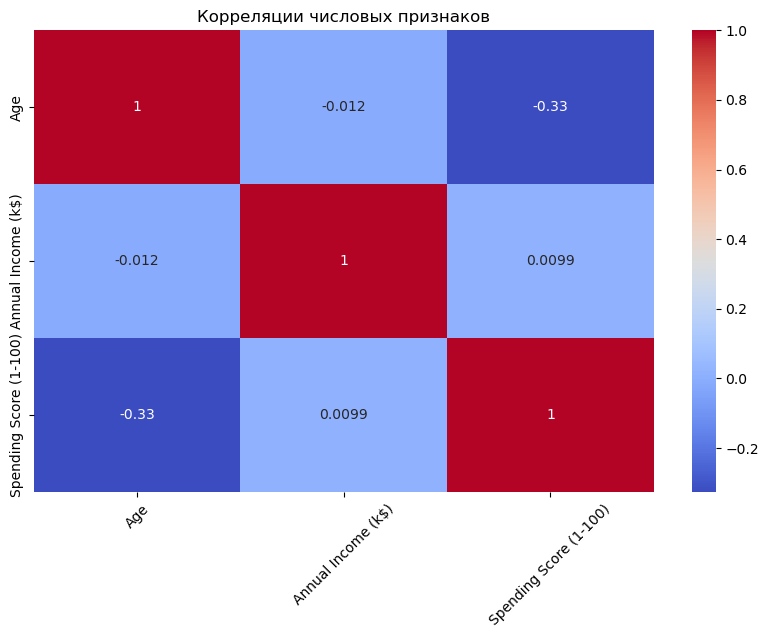

In [236]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Частота')

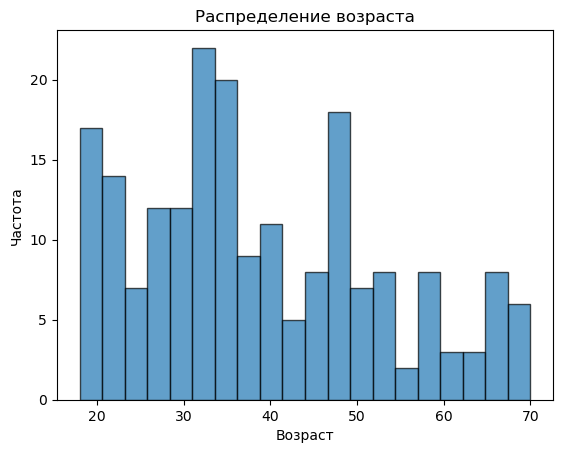

In [237]:
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

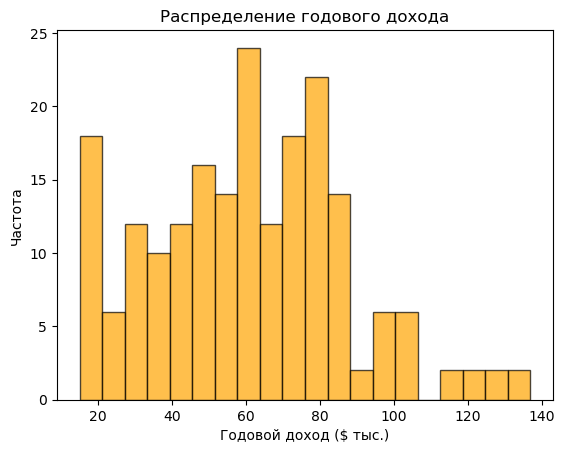

In [239]:
plt.hist(df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Распределение годового дохода')
plt.xlabel('Годовой доход ($ тыс.)')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

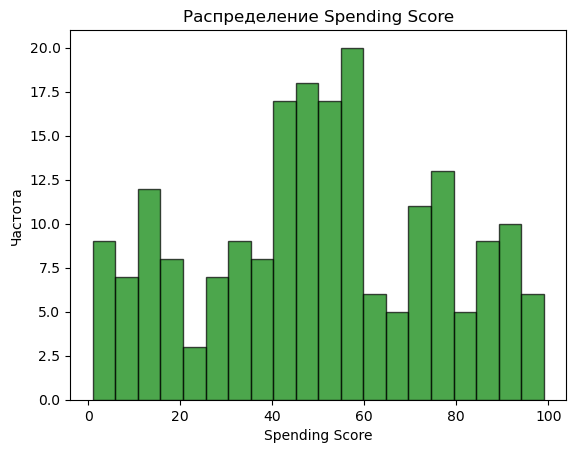

In [241]:
plt.hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Распределение Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Частота')

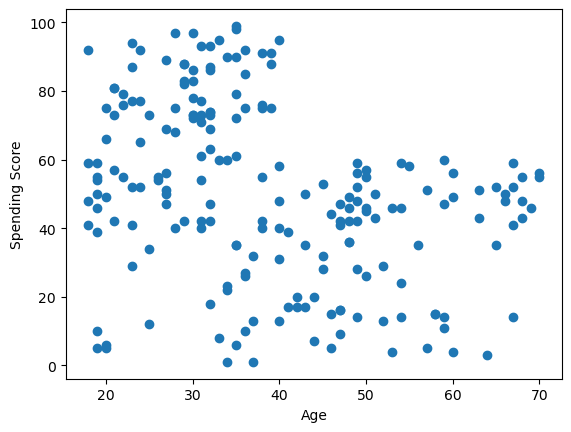

In [242]:
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

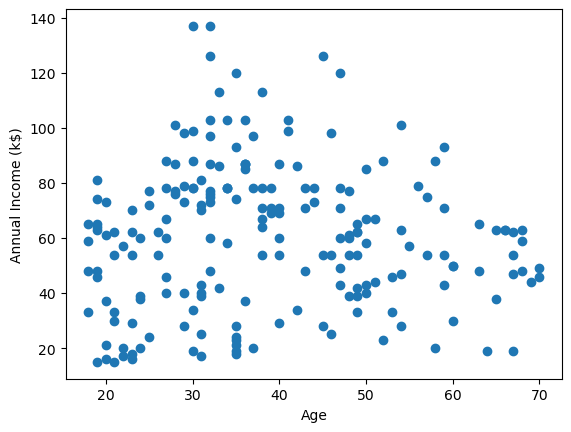

In [244]:
plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

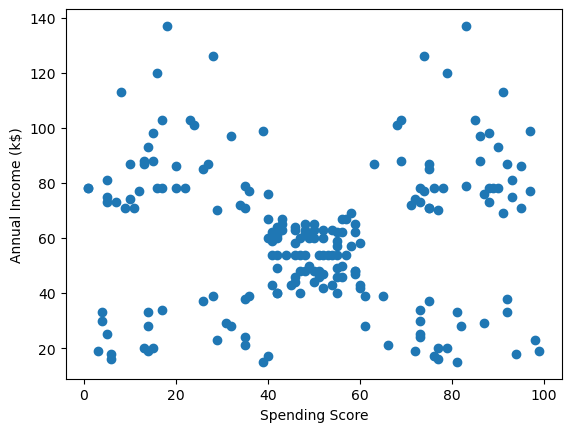

In [246]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.show()

Text(0, 0.5, 'Количество')

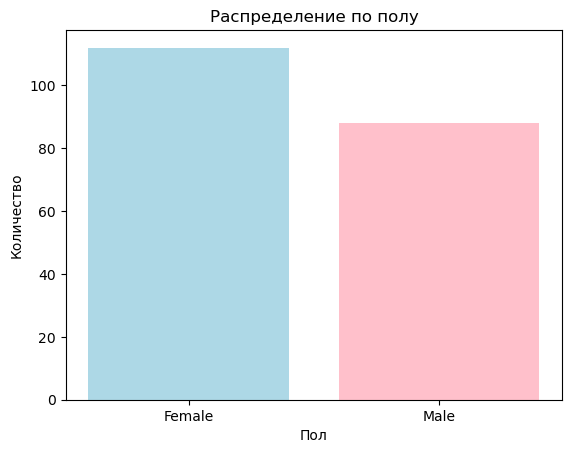

In [248]:
gender_counts = df['Genre'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')

По графикам, которые сформировал, можно предположить, что для нас подходящее число кластеров - примерно 6. Именно этим количеством получается хорошо описать визуально

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

In [255]:
le = LabelEncoder() # le для бинарного признака 0 1
df["Genre"] = le.fit_transform(df["Genre"])

In [257]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [260]:
inertias = []

K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Метод локтя (Elbow Method)')

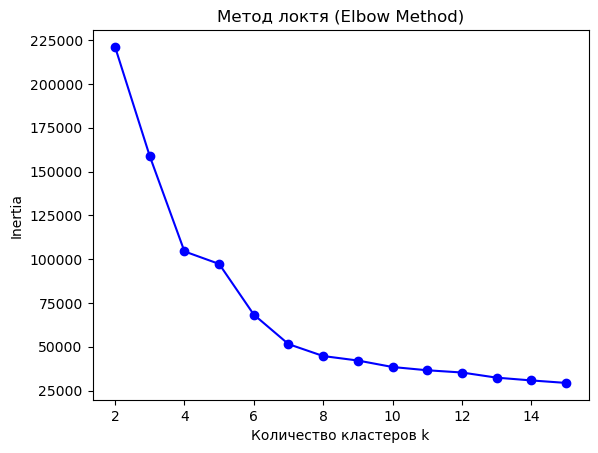

In [262]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [265]:
kmeans_best = KMeans(n_clusters=6, random_state=42)
kmeans_best.fit(df)

KMeans(random_state=42)